In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class AdalineGD():
    """Klasyfikator — ADAptacyjny LIniowy NEuron.

    Parametry
    ------------
    eta : zmiennoprzecinkowy
        Współczynnik uczenia (w zakresie pomiędzy 0.0 i 1.0)
    n_iter : liczba całkowita
        Liczba przebiegów po zestawie uczącym.
    random_state : liczba całkowita
      Ziarno generatora liczb losowych służący do losowego
      inicjowania wag.


    Atrybuty
    -----------
    w_ : jednowymiarowa tablica
        Wagi po dopasowaniu.
    cost_ : lista
      Suma kwadratów błędów (wartość funkcji kosztu) w każdej epoce.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Trenowanie za pomocą danych uczących.

        Parametry
        ----------
        X : {tablicopodobny}, wymiary = [n_próbek, n_cech]
            Wektory uczenia,
            gdzie n_próbek oznacza liczbę próbek, a
            n_cech – liczbę cech.
        y : tablicopodobny, wymiary = [n_próbek]
            Wartości docelowe.

        Zwraca
        -------
        self : obiekt

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            
            # Zwróć uwagę, że metoda "activation" nie ma wpływu na działanie kodu,
            # gdyż jest to zwykła funkcja tożsamościowa. Moglibyśmy zamiast tego napisać
            # bezpośrednio po prostu `output = self.net_input(X)`.
            # Zastosowanie tej aktywacji w tym miejscu jest bardziej pojęciowe, np.  
            # podczas korzystania z regresji logistycznej (o czym przekonamy się już wkrótce)
            # możemy zastąpić tę funkcję funkcją sigmoidalną, dzięki czemu
            # uzyskamy klasyfikator bazujący na regresji logistycznej.
            output = self.activation(net_input)
            errors = (y - output)
            if i == 1:
                print(output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """oblicza pobudzenie całkowite"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """oblicza liniową funkcję aktywacji"""
        return X

    def predict(self, X):
         """zwraca etykietę klas po wykonaniu skoku jednostkowego"""
         return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [24]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
y =  df.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa',-1,1)

X = df.iloc[0:100,[0,2]].values

In [25]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # konfiguruje generator znaczników i mapę kolorów
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # rysuje wykres powierzchni decyzyjnej
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # rysuje wykres próbek
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

[-1.41460238 -1.6440783  -1.94119611 -1.92065027 -1.52934034 -0.86746282
 -1.98829216 -1.46169844 -2.21776808 -1.5764364  -1.00274662 -1.62353245
 -1.75881625 -2.53543173 -0.74672049 -0.65853275 -1.13803042 -1.41460238
 -0.52324895 -1.34696048 -0.86746282 -1.34696048 -2.25885976 -1.21167669
 -1.42060676 -1.39405654 -1.39405654 -1.23222253 -1.29986443 -1.73827041
 -1.62353245 -1.00274662 -1.23222253 -0.95565056 -1.5764364  -1.66462414
 -1.02329246 -1.5764364  -2.28540998 -1.34696048 -1.59698224 -2.17067202
 -2.28540998 -1.39405654 -1.07639289 -1.75881625 -1.27931859 -1.98829216
 -1.11748457 -1.52934034  2.99760146  2.17388992  3.0181473   0.80303882
  2.35626978  1.37072423  2.19443576 -0.35888221  2.47100773  0.39118305
 -0.10886046  1.39727444  1.3767286   1.96495985  0.64720918  2.45046189
  1.25598627  1.21489459  1.94441401  0.85013488  1.80312584  1.49146656
  2.32971956  1.96495985  2.03860612  2.33572393  2.83576744  2.85631329
  1.7149381   0.69430524  0.66775502  0.60011312  1

C:\Users\Adam\AppData\Local\Temp\ipykernel_13668\431424220.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


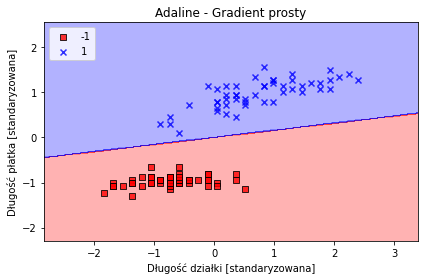

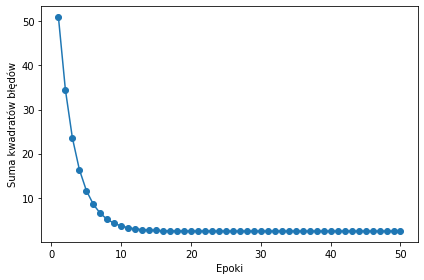

In [26]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
ada = AdalineGD(n_iter=50, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient prosty')
plt.xlabel('Długość działki [standaryzowana]')
plt.ylabel('Długość płatka [standaryzowana]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('rysunki/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epoki')
plt.ylabel('Suma kwadratów błędów')

plt.tight_layout()
#plt.savefig('rysunki/02_14_2.png', dpi=300)
plt.show()